# World Religion Projection 2010 - 2050

The provided datasets contain information about the estimated religious composition of 198 countries and territories from 2010 to 2050. The data is sourced from the PEW RESEARCH CENTER, a respected organization known for its studies on religion and public opinion.

The first dataset, "rounded_population.csv," includes the following columns:
- Year: This column specifies the year for which the data is recorded.
- Region: It represents the region to which the country belongs.
- Country: This column contains the name of each country.
- Buddhists: The estimated number of Buddhists in the country for the given year.
- Christians: The estimated number of Christians in the country for the given year.
- Folk Religions: The estimated number of followers of folk religions in the country for the given year.
- Hindus: The estimated number of Hindus in the country for the given year.
- Jews: The estimated number of Jews in the country for the given year.
- Muslims: The estimated number of Muslims in the country for the given year.
- Other Religions: The estimated number of followers of other religions in the country for the given year.
- Unaffiliated: The estimated number of people with no religious affiliation in the country for the given year.

The second dataset, "rounded_percentage.csv," contains the following columns:
- Year: This column specifies the year for which the data is recorded.
- Region: It represents the region to which the country belongs.
- Country: This column contains the name of each country.
- Christians: The percentage share of Christians in the country's population for the given year.
- Muslims: The percentage share of Muslims in the country's population for the given year.
- Unaffiliated: The percentage share of people with no religious affiliation in the country's population.
- Hindus: The percentage share of Hindus in the country's population for the given year.
- Buddhists: The percentage share of Buddhists in the country's population for the given year.
- Folk Religions: The percentage share of followers of folk religions in the country's population.
- Other Religions: The percentage share of followers of other religions in the country's population.
- Jews: The percentage share of Jews in the country's population for the given year.
- All Religions: The percentage share of all religious groups combined in the country's population for the year.

These datasets provide valuable insights into the projected religious demographics of various countries and regions over several decades. Researchers, analysts, and individuals interested in studying religious trends, population dynamics, and cultural shifts can utilize this data for a wide range of purposes and analyses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-religion-projections/rounded_percentage.csv
/kaggle/input/world-religion-projections/rounded_population.csv


# Mergeing both datasets

In [3]:
rounded_percentage = pd.read_csv('/kaggle/input/world-religion-projections/rounded_percentage.csv')
rounded_population = pd.read_csv('/kaggle/input/world-religion-projections/rounded_population.csv')
merged_df = pd.merge(rounded_population, rounded_percentage, on=['Country', 'Region', 'Year'])

In [4]:
merged_df.head()

,Year,Region,Country,Christians_x,Muslims_x,Unaffiliated_x,Hindus_x,Buddhists_x,Folk Religions_x,Other Religions_x,Jews_x,All Religions,Buddhists_y,Christians_y,Folk Religions_y,Hindus_y,Jews_y,Muslims_y,Other Religions_y,Unaffiliated_y
0,2010,World,All Countries,2168330000,1599700000,1131150000,1032210000,487760000,404690000,58150000,13860000,6895850000,7.1,31.4,5.9,15.0,1.0,23.2,1.0,16.4
1,2010,North America,All Countries,266630000,3480000,59040000,2250000,3860000,1020000,2200000,6040000,344530000,1.1,77.4,1.0,1.0,1.8,1.0,1.0,17.1
2,2010,Latin America-Caribbean,All Countries,531280000,840000,45390000,660000,410000,10040000,990000,470000,590080000,1.0,90.0,1.7,1.0,1.0,1.0,1.0,7.7
3,2010,Europe,All Countries,553280000,43470000,139890000,1380000,1350000,870000,890000,1420000,742550000,1.0,74.5,1.0,1.0,1.0,5.9,1.0,18.8
4,2010,Middle East-North Africa,All Countries,12710000,317070000,2100000,1720000,500000,1060000,230000,5630000,341020000,1.0,3.7,1.0,1.0,1.6,93.0,1.0,1.0


# Regional Variation of Religious Groups

<Figure size 1000x600 with 0 Axes>

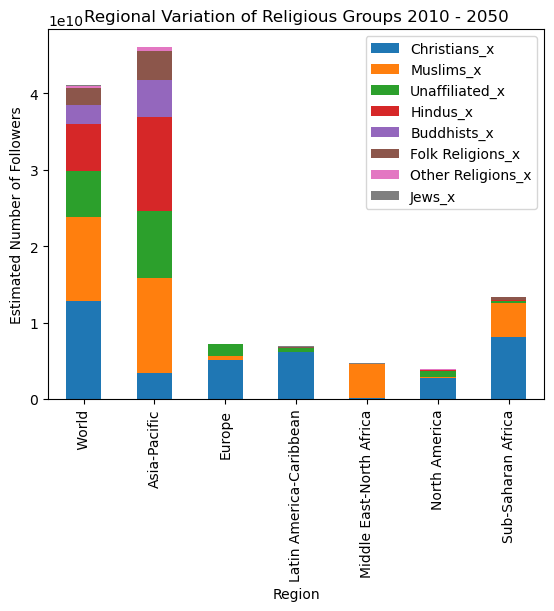

In [5]:
religions = ['Christians_x', 'Muslims_x', 'Unaffiliated_x', 'Hindus_x', 'Buddhists_x', 'Folk Religions_x', 'Other Religions_x', 'Jews_x']
region_totals = merged_df.groupby('Region')[religions].sum()
plt.figure(figsize= (10,6))
region_totals.plot(kind='bar', stacked=True)

plt.title('Regional Variation of Religious Groups 2010 - 2050')
plt.xlabel('Region')
plt.ylabel('Estimated Number of Followers')
plt.legend()

plt.show()

# Percentage Share of Religious Groups

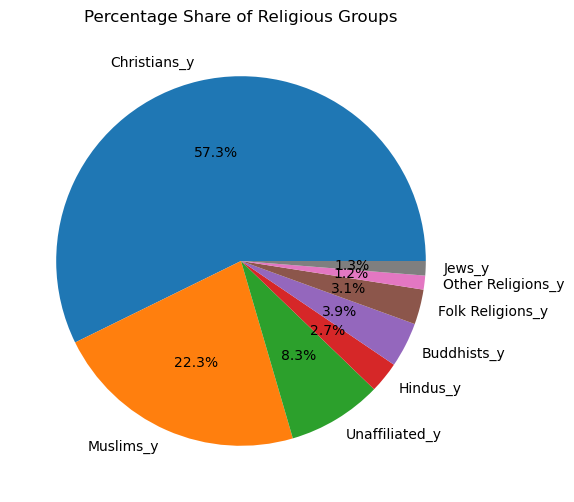

In [6]:
religions_percentage = ['Christians_y', 'Muslims_y', 'Unaffiliated_y', 'Hindus_y', 'Buddhists_y', 'Folk Religions_y', 'Other Religions_y', 'Jews_y']
percentage_totals = merged_df[religions_percentage].sum()
plt.figure(figsize=(10, 6))
plt.pie(percentage_totals, labels=religions_percentage, autopct='%1.1f%%')

plt.title('Percentage Share of Religious Groups')

plt.show()

# Correlation Matrix of Religious Groups

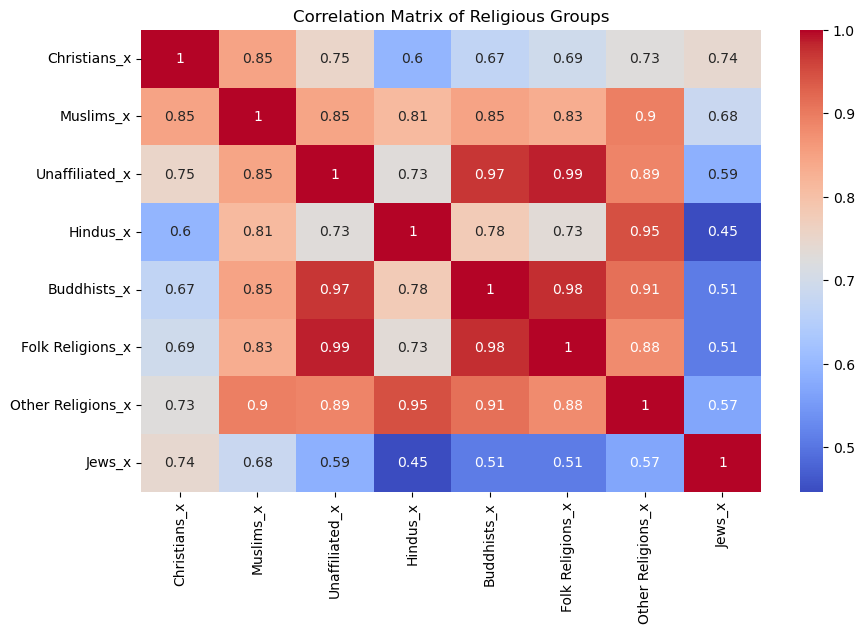

In [7]:
correlation_matrix = merged_df[religions].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Religious Groups')
plt.show()

# US Religion comparision 2020 with 2050

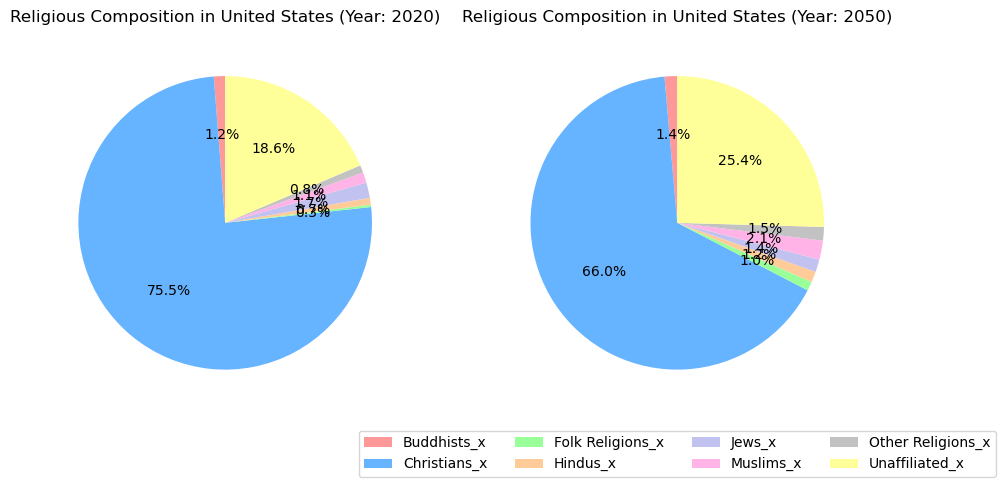

In [8]:
country = "United States"
year_2020 = 2020
year_2050 = 2050

filtered_data_2020 = merged_df[(merged_df["Country"] == country) & (merged_df["Year"] == year_2020)]
population_columns_2020 = ["Buddhists_x", "Christians_x", "Folk Religions_x", "Hindus_x", "Jews_x", "Muslims_x", "Other Religions_x", "Unaffiliated_x"]
filtered_data_2050 = merged_df[(merged_df["Country"] == country) & (merged_df["Year"] == year_2050)]
population_columns_2050 = ["Buddhists_y", "Christians_y", "Folk Religions_y", "Hindus_y", "Jews_y", "Muslims_y", "Other Religions_y", "Unaffiliated_y"]

total_followers_2020 = filtered_data_2020[population_columns_2020].sum().sum()
total_followers_2050 = filtered_data_2050[population_columns_2050].sum().sum()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sizes_2020 = filtered_data_2020[population_columns_2020].values.flatten()
axes[0].pie(sizes_2020, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c2c2c2", "#ffff99"], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Religious Composition in {} (Year: {})".format(country, year_2020))
axes[0].axis("equal")
sizes_2050 = filtered_data_2050[population_columns_2050].values.flatten()
axes[1].pie(sizes_2050, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c2c2c2", "#ffff99"], autopct="%1.1f%%", startangle=90)
axes[1].set_title("Religious Composition in {} (Year: {})".format(country, year_2050))
axes[1].axis("equal")

plt.legend(population_columns_2020, loc="center", bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.subplots_adjust(wspace=0.4)

plt.show()